In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv('aggregate_covid_country.csv')
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
covid.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [4]:
df=pd.DataFrame(data=covid)

In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
df.head(20)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [7]:
df.tail(20)

,Date,Country,Confirmed,Recovered,Deaths
23668,2020-05-26,Thailand,3045,2929,57
23669,2020-05-26,Timor-Leste,24,24,0
23670,2020-05-26,Togo,391,177,13
23671,2020-05-26,Trinidad and Tobago,116,108,8
23672,2020-05-26,Tunisia,1051,929,48
23673,2020-05-26,Turkey,158762,121507,4397
23674,2020-05-26,US,1680913,384902,98913
23675,2020-05-26,Uganda,253,69,0
23676,2020-05-26,Ukraine,21584,7575,644
23677,2020-05-26,United Arab Emirates,31086,15982,253


In [8]:
df.isnull()

,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,False,False
23684,False,False,False,False,False
23685,False,False,False,False,False
23686,False,False,False,False,False


In [141]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
Date         23688 non-null object
Country      23688 non-null object
Confirmed    23688 non-null int64
Recovered    23688 non-null int64
Deaths       23688 non-null int64
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [143]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [144]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [10]:
df['Country'].value_counts()

Israel                 126
Monaco                 126
Luxembourg             126
Trinidad and Tobago    126
Ireland                126
                      ... 
Croatia                126
Botswana               126
Panama                 126
Russia                 126
Australia              126
Name: Country, Length: 188, dtype: int64

In [145]:
df.shape

(23688, 5)

In [146]:
df['active']=df['Confirmed']-df['Deaths']-df['Recovered']

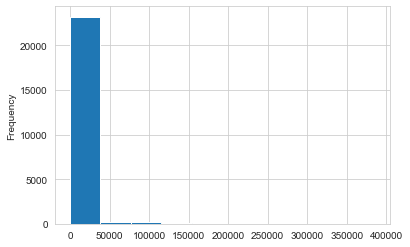

In [147]:
df['Recovered'].plot.hist()

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Recovered',data=df)

In [ ]:
#sns.set_style('dark')
#sns.countplot(x='Deaths',hue='Country',data=df,palette='rainbow')

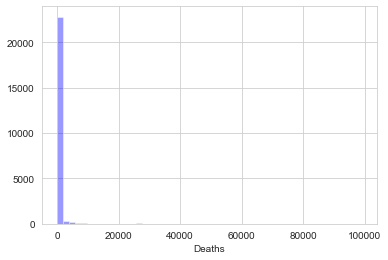

In [57]:
sns.distplot(df['Deaths'],kde=False,color='Blue',bins=50)

In [ ]:
sns.countplot(x='Deaths',data=df)

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(6,8))
sns.boxplot(x='Confirmed',y='Recovered',data=df,palette='GnBu')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
Date         23688 non-null object
Country      23688 non-null object
Confirmed    23688 non-null int64
Recovered    23688 non-null int64
Deaths       23688 non-null int64
active       23688 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [149]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
active        int64
dtype: object

In [150]:
con_n={'Country':str}
df.astype(con_n)
print(df.dtypes)

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
active        int64
dtype: object


In [152]:
top=df[df['Date']==df['Date'].max()]
world=top.groupby('Country')['Confirmed','active','Deaths'].sum().reset_index()
world.head()

,Country,Confirmed,active,Deaths
0,Afghanistan,11831,10483,220
1,Albania,1029,193,33
2,Algeria,8697,3162,617
3,Andorra,763,36,51
4,Angola,70,48,4


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Date')]

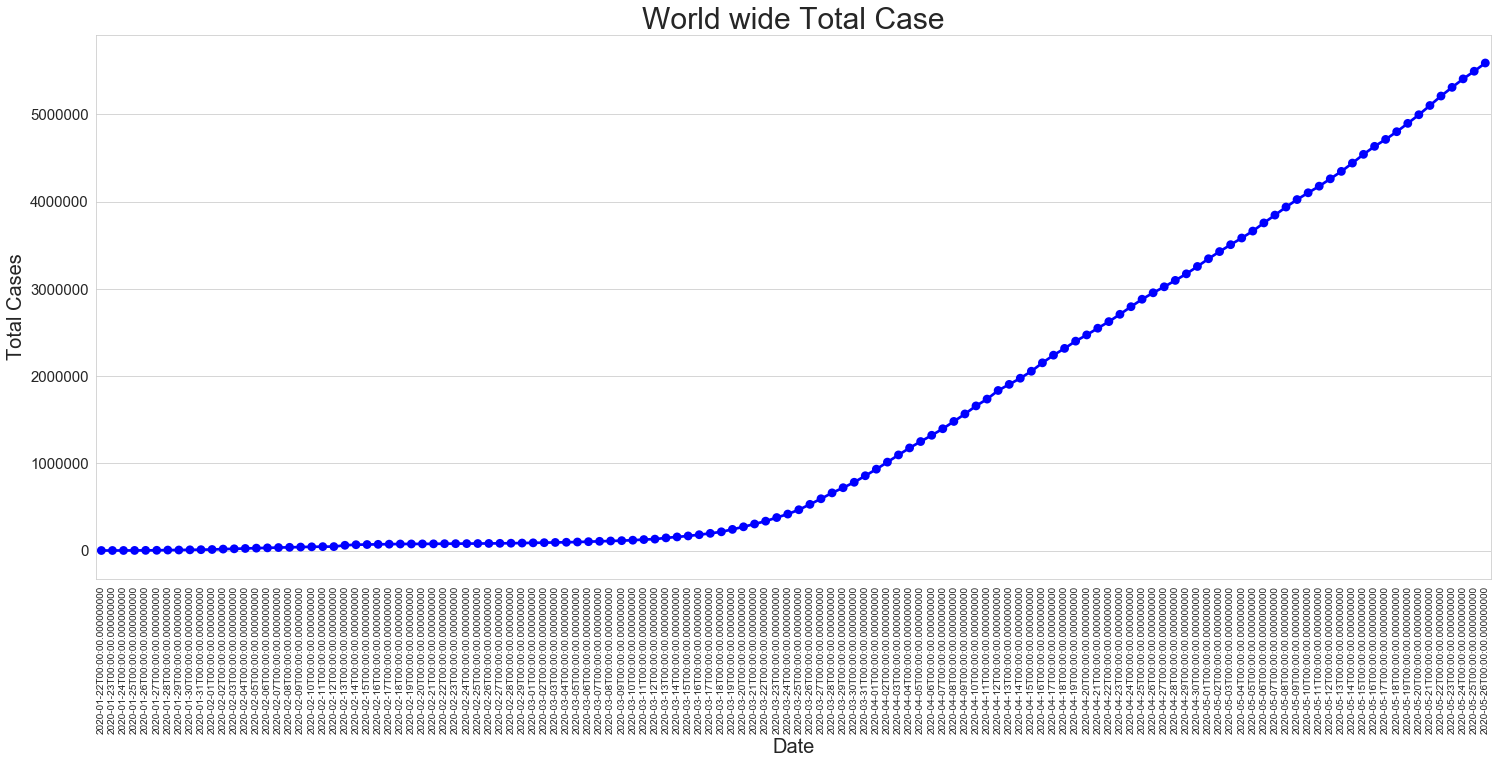

In [163]:
plt.figure(figsize=(25,10))
plt.xlabel("Dates",fontsize=20)
plt.xticks(rotation = 90,fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Total Cases",fontsize=20)
plt.title("World wide Total Case",fontsize=30)
total_case=df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_case['Date']=pd.to_datetime(total_case['Date'])

ax=sns.pointplot(x=total_case.Date,y=total_case.Confirmed,color='b')
ax.set(xlabel='Date',ylabel='Total Cases')

In [14]:
india_case=df[df['Country']=='India']

In [17]:
last_days=india_case.tail()

In [18]:
last_days.tail()

,Date,Country,Confirmed,Recovered,Deaths
22827,2020-05-22,India,124794,51824,3726
23015,2020-05-23,India,131423,54385,3868
23203,2020-05-24,India,138536,57692,4024
23391,2020-05-25,India,144950,60706,4172
23579,2020-05-26,India,150793,64277,4344


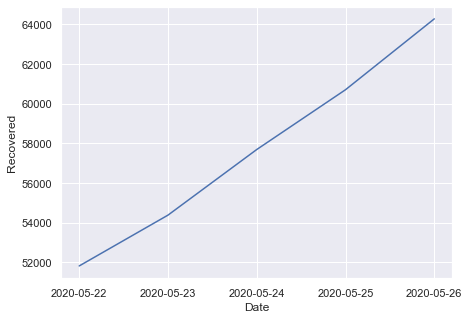

In [22]:
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(x='Date',y='Recovered',data=last_days)
plt.show()

In [36]:
import datetime as dt

In [38]:
#converting string date to date-time
india_case['Date']=pd.to_datetime(india_case['Date'])
india_case.head()

,Date,Country,Confirmed,Recovered,Deaths
79,1970-01-01 00:00:00.000719163,India,0,0,0
267,1970-01-01 00:00:00.000719163,India,0,0,0
455,1970-01-01 00:00:00.000719163,India,0,0,0
643,1970-01-01 00:00:00.000719163,India,0,0,0
831,1970-01-01 00:00:00.000719163,India,0,0,0


In [39]:
#convert date-time to ordinal
india_case['Date']=india_case['Date'].map(dt.datetime.toordinal)
india_case.tail()

,Date,Country,Confirmed,Recovered,Deaths
22827,719163,India,124794,51824,3726
23015,719163,India,131423,54385,3868
23203,719163,India,138536,57692,4024
23391,719163,India,144950,60706,4172
23579,719163,India,150793,64277,4344


In [40]:
x=india_case['Date']
y=india_case['Confirmed']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [42]:
ln=LinearRegression()

In [46]:
ln.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
india_case.tail()

,Date,Country,Confirmed,Recovered,Deaths
22827,719163,India,124794,51824,3726
23015,719163,India,131423,54385,3868
23203,719163,India,138536,57692,4024
23391,719163,India,144950,60706,4172
23579,719163,India,150793,64277,4344


In [51]:
predle=ln.predict(np.array(x_test).reshape(-1,1))

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
print(mean_squared_error(y_test,predle))
print(mean_absolute_error(y_test,predle))

2301981417.4253435
34406.97813411079
